# Esercizi 05

<span style="color:blue">Il ground state 1s per l'atomo di idrogeno è dato dalla seguente funzione d'onda:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
mentre la funzione d'onda di uno stato eccitato 2p è:
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
A queste autofunzioni corrispondono i seguenti valori di aspettazione per la distanza dell'elettrone dal nucleo:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$
</span>

Date le funzioni d'onda sopraccitate, le corrispondenti distribuzioni di probabilità in coordinate cartesiane sono date da:
$$p_{1,0,0}(x,y,z) = |\tilde{\psi}_{1,0,0}(x,y,z)|^2 \propto e^{-\frac{2\sqrt{x^2+y^2+z^2}}{a_0}}$$

$$p_{2,1,0}(x,y,z) = |\tilde{\psi}_{2,1,0}(x,y,z)|^2 \propto (x^2+y^2+z^2)e^{-\frac{\sqrt{x^2+y^2+z^2}}{a_0}}\frac{z^2}{x^2+y^2+z^2}=z^2e^{-\frac{\sqrt{x^2+y^2+z^2}}{a_0}}$$

Per la scelta della probabilità di transizione tentativo si sono considerate due distribuzioni di probabilità:
* $T(\vec{x}|\vec{y})$ uniforme: $x_i = unif(y_i - \delta, y_i+\delta)$
* $T(\vec{x}|\vec{y})$ gaussiana: $x_i = \frac{1}{\sqrt{2\pi \sigma^2}}e^{-\frac{(x_i - y_i)^2}{2\sigma^2}}$


Nelle distribuzioni di probabilità sopra riportate non ho considerato la normalizzazione: utilizzando delle matrici di transizioni simmetriche (questo è il nostro caso), non è necessario calcolarla. Infatti, l'acceptance rate $\alpha=\min \left(1,\frac{p(\vec{x})}{p(\vec{y})}\right)$ dipende solo dal rapporto della distribuzione di probabilità da campionare valutata in due punti diversi, quindi la costante di normalizzazione si semplifica. 

## Scelta larghezza distribuzione

Per scegliere che larghezza usare per la probabilità di transizione ho cominciato a effettuare alcune simulazioni con un numero elevato di punti ($M\geq10^6$), calcolando la media di $\alpha=\min \left(1,\frac{p(\vec{x})}{p(\vec{y})}\right)$ (acceptance rate) passo per passo. Scegliendo un numero di passi così elevato sono sufficientemente sicuro di raggiungere l'equilibrio (a meno di scegliere un punto iniziale estremamente patologico) e di ottenere quindi valori medi di $\alpha$ ragionevoli nelle zone che sono interessato a esplorare. Osservo che effettivamente il valore di $\langle \alpha \rangle$ converge. Regolando "manualmente" il valore di $\delta$ è possibile raggiungere un valore di $\langle \alpha \rangle$ vicino a $0.5$.

I valori che ho scelto di utilizzare sono, <span style="color:red">per la distribuzione uniforme, $\delta_{1,0,0}=1.225$ e $\delta_{2,1,0}=2.98$</span>. <span style="color:red"> Per la distribuzione gaussiana </span>, invece, ho scelto <span style="color:red"> $\sigma_{1,0,0}=0.76$ e $\sigma_{2,1,0}=1.88$</span>.

Questi valori sono stati ottenuti senza fare particolari ragionamenti sul punto iniziale (ma non sembrano esserne molto influenzati). Comunque, nel caso fosse necessario, si può ripetere lo stesso procedimento una volta scelto il punto iniziale e per ottenere valori migliori per la larghezza della distribuzione.



## Punto iniziale - Raggiungimento dell'equilibrio

L'algoritmo di metropolis è un processo di Markov: l'estrazione di un nuovo punto dipende soltanto da quello precedente. Sappiamo inoltre che questo processo di Markov è legato a una distribuzione di probabilità limite (quella che vogliamo campionare) che viene raggiunta al limite dopo un numero infinito di step.

Queste due considerazioni suggeriscono come riconoscere il raggiungimento dell'equilibrio. Supponiamo di aver raggiunto l'equilibrio dopo un numero sufficiente di step (questo è garantito se il numero di step è abbastanza grande), verosimilmente il punto in nostro possesso sarà un punto abbastanza probabile (secondo la distribuzione di probabilità limite, ovvero quella che vogliamo campionare) e il passo successivo è determinato **esclusivamente** da questo punto; consideriamo ora la situazione in cui questo punto costituisce il punto iniziale del nostro algoritmo: non c'è alcuna differenza con la continuazione del primo caso.

Un buon punto per iniziare è quindi un punto sufficientemente probabile della distribuzione da campionare. Inoltre, per quanto detto prima, la scelta di un buon punto iniziale corrisponde a una situazione di equilibrio. Ovviamente, non tutti i casi è possibile determinare a priori quali sono i punti più probabili di una distribuzione di probabilità (si pensi, ad esempio, all'insieme canonico, dove la probabilità di ogni stato corrisponde al peso di Boltzmann opportunamente normalizzato).

Per la distribuzione di probabilità associata al <span style="color:red">ground state</span>, il punto più probabile è l'origine <span style="color:red">(0,0,0)</span> (e quindi è un buon punto per partire). Per la distribuzione di probabilità associata allo <span style="color:red">stato 2p</span>, invece, l'origine (e tutto il piano $z=0$) corrisponde a una probabilità nulla (e quindi *non* è un buon punto per iniziare), mentre si hanno dei massimi per <span style="color:red">$(0,0,\pm 2)$</span>. In realtà, l'origine non è punto così cattivo neanche per la distribuzione dello stato 2p: è vero che esso ha probabilità nulla, ma vicino ad esso ci sono ampie zone in cui i punti hanno una probabilità non trascurabile.

Diversa è la situazione in cui il punto iniziale è scelto molto lontano dall'origine: entrambe le distribuzione di probabilità decrescono esponenzialmente. Partendo da tali punti si capisce cosa succede nelle fasi iniziali del campionamento: essendo la larghezza della distribuzione uniforme fissata, i primi punti non potranno essere troppo lontani dal primo, si vede quindi chiaramente la "scia" che questi punti lasciano per avvicinarsi alle zone più probabili della distribuzione da campionare.

In seguito mostro gli effetti della scelta del punto iniziale soltanto nel caso di probabilità di transizione uniforme (il caso gaussiano sarebbe analogo)

### Punti iniziali lontani

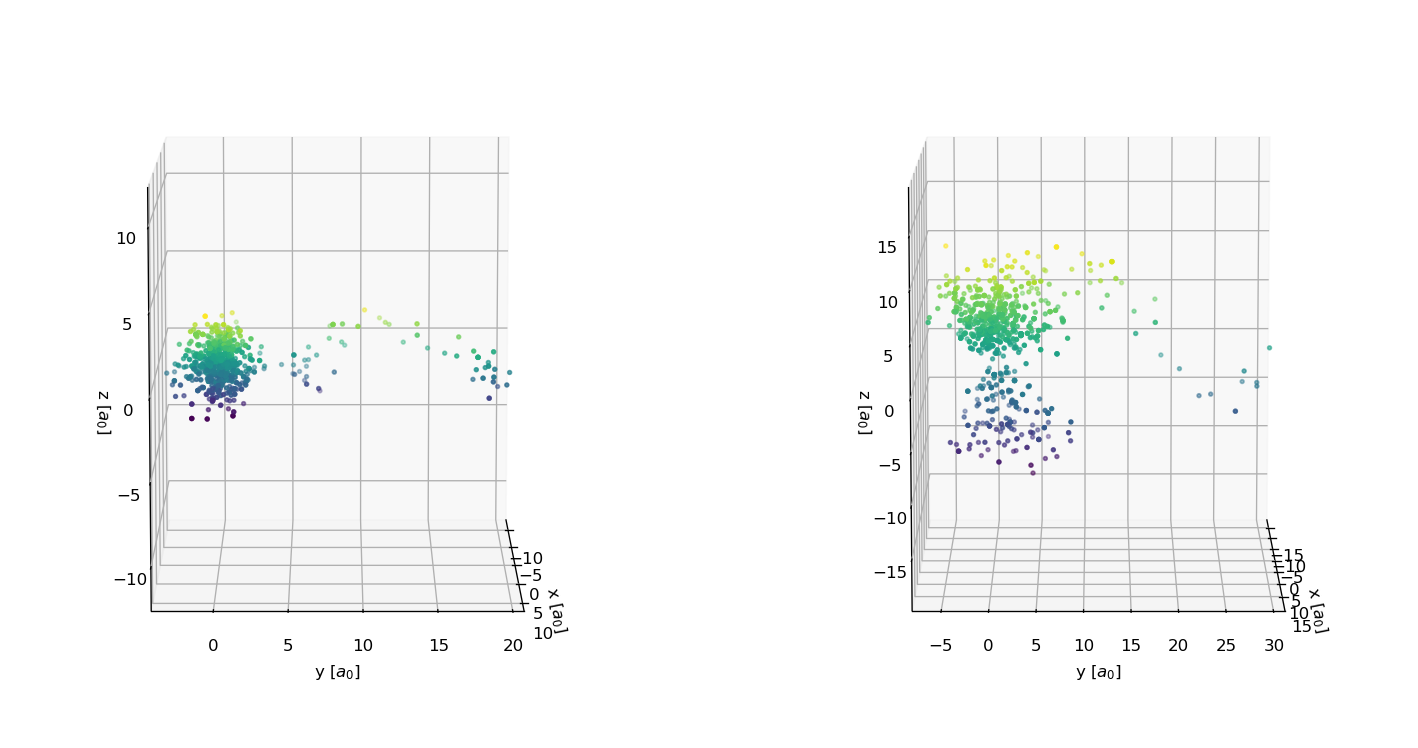

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x100,y100,z100 = np.loadtxt("Ex_05_1/EquilibriumFar/eq100.points", delimiter=",", skiprows=1, usecols=(0,1,2), dtype="float,float,float", unpack=True)
x210,y210,z210 = np.loadtxt("Ex_05_1/EquilibriumFar/eq210.points", delimiter=",", skiprows=1, usecols=(0,1,2), dtype="float,float,float", unpack=True)

fig =plt.figure(figsize=(15,8),dpi=120)
ax100 = fig.add_subplot(121, projection='3d')
ax210 = fig.add_subplot(122, projection='3d')
ax100.scatter(x100, y100, z100 ,c=z100, marker=".")
ax210.scatter(x210, y210, z210, c=z210, marker=".")
ax100.set_xlabel(r'x $[a_0]$')
ax100.set_ylabel(r'y $[a_0]$')
ax100.set_zlabel(r'z $[a_0]$')
ax210.set_xlabel(r'x $[a_0]$')
ax210.set_ylabel(r'y $[a_0]$')
ax210.set_zlabel(r'z $[a_0]$')

#Per mantenere la stessa scala su tutti gli assi
max_range100 = np.array([x100.max()-x100.min(), y100.max()-y100.min(), z100.max()-z100.min()]).max() / 2.0
mid_x100 = (x100.max()+x100.min()) * 0.5
mid_y100 = (y100.max()+y100.min()) * 0.5
mid_z100 = (z100.max()+z100.min()) * 0.5
ax100.set_xlim(mid_x100 - max_range100, mid_x100 + max_range100)
ax100.set_ylim(mid_y100 - max_range100, mid_y100 + max_range100)
ax100.set_zlim(mid_z100 - max_range100, mid_z100 + max_range100)

#Per mantenere la stessa scala su tutti gli assi
max_range210 = np.array([x210.max()-x210.min(), y210.max()-y210.min(), z210.max()-z210.min()]).max() / 2.0
mid_x210 = (x210.max()+x210.min()) * 0.5
mid_y210 = (y210.max()+y210.min()) * 0.5
mid_z210 = (z210.max()+z210.min()) * 0.5
ax210.set_xlim(mid_x210 - max_range210, mid_x210 + max_range210)
ax210.set_ylim(mid_y210 - max_range210, mid_y210 + max_range210)
ax210.set_zlim(mid_z210 - max_range210, mid_z210 + max_range210)

ax100.view_init(10,0)
ax210.view_init(10,0)
plt.show()

In questi grafici ho rappresentato i primi 1000 punti estratti partendo dai punti (0,20,0) per lo stato 1s e (0,30,0) per lo stato 2p. Si vede chiaramente la scia lasciata dai primi punti, mentre una volta che i punti hanno raggiunto le zone più probabili tendono a rimanere lì (nella misura prevista dalle distribuzioni da campionare).

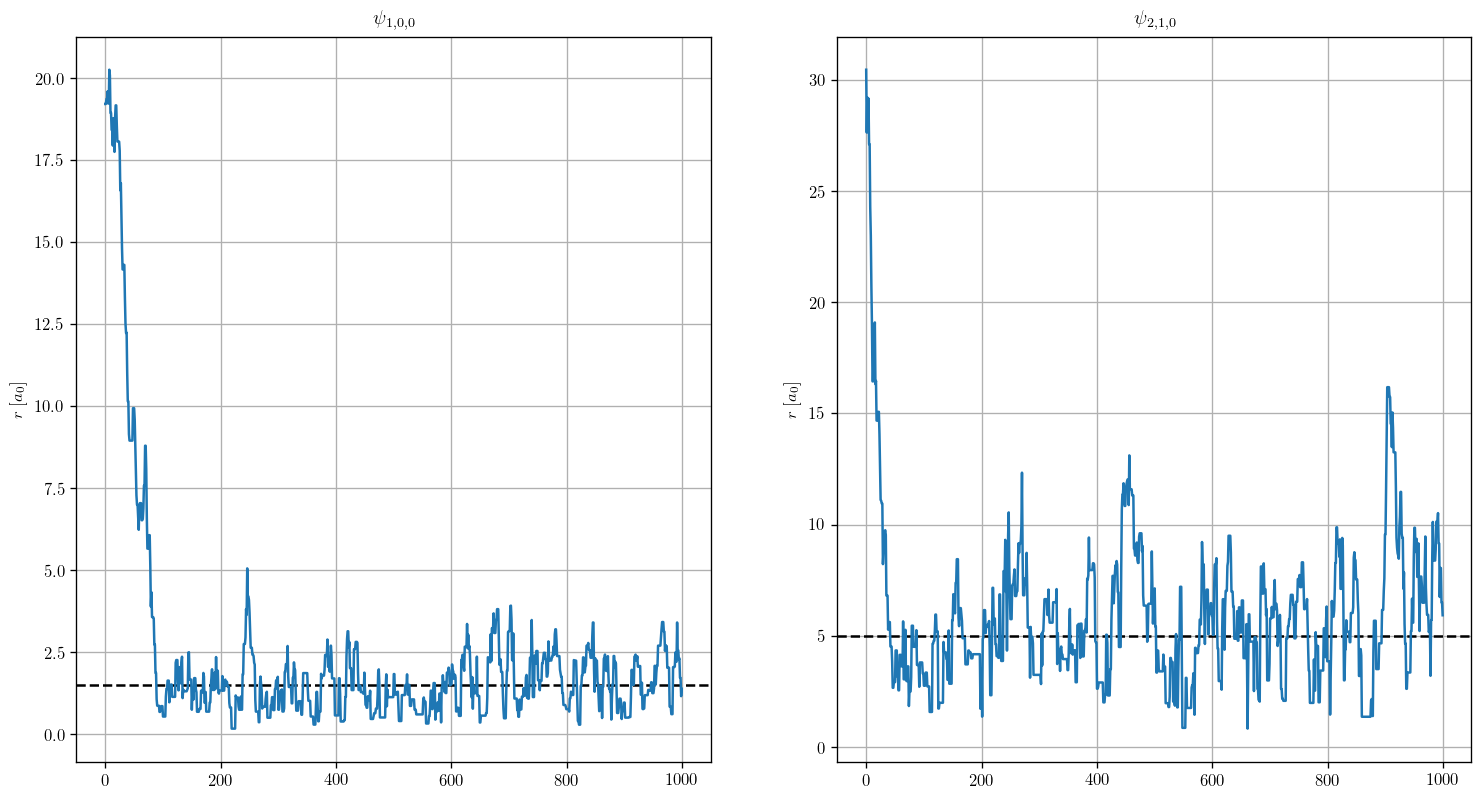

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

eq_r100=np.loadtxt("Ex_05_1/EquilibriumFar/out_eq_r100.txt")
eq_r210=np.loadtxt("Ex_05_1/EquilibriumFar/out_eq_r210.txt")

plt.rc('text', usetex=True)
plt.rc('font', family='serif')


fig, ax=plt.subplots(1,2, figsize=(15,8), dpi=120)

ax[0].axhline(1.5, 0,1, color="black",linestyle="dashed")
ax[1].axhline(5, 0,1, color="black",linestyle="dashed")

ax[0].plot(eq_r100)
ax[1].plot(eq_r210)

ax[0].set_title(r"$ \psi_{1,0,0}$")
ax[1].set_title(r"$\psi_{2,1,0}$")

for iax in ax:
    iax.set_ylabel(r"$r \; [a_0]$")
    iax.set_xlabel("")
    iax.grid(True)
    
plt.show()

Considerando i valori istantanei dei raggi per ogni punto estratto, si vede che effettivamente i punti che costituiscono la scia sono i primi: per il ground state ci voglioni circa 100 steo per raggiugnere l'equilibrio, mentre per lo stato 2p ne bastano circa 50 (è ragionevole: la distribuzione di probabilità dello stato 2p è più "sparpagliata" rispetto a quella dello stato 1s).

### Punti iniziali "corretti"

Ripropongo i grafici sopra, utilizzando come punti iniziali $(0,0,0)$ per lo stato 1s e $(0,0,2)$ per lo stato 2p.

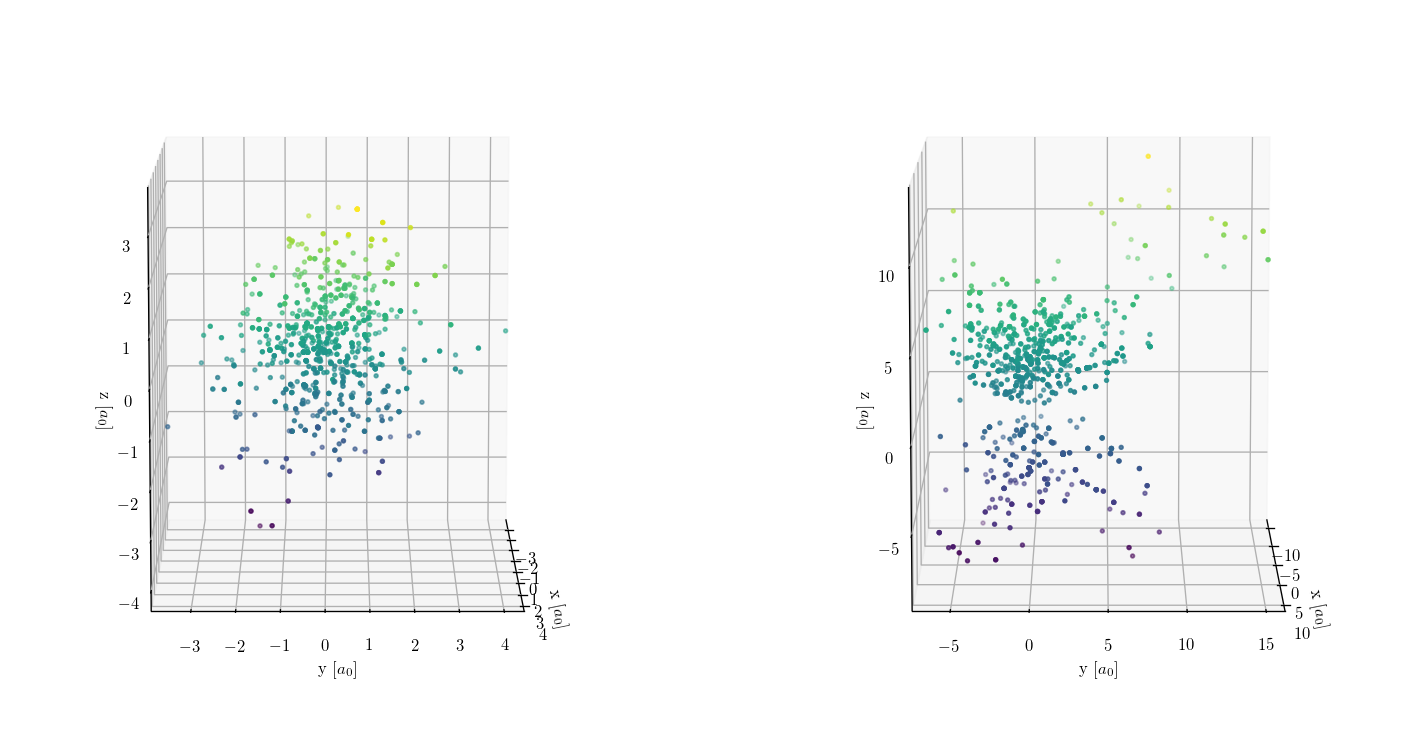

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x100,y100,z100 = np.loadtxt("Ex_05_1/Unif/eq100.points", delimiter=",", skiprows=1, usecols=(0,1,2), dtype="float,float,float", unpack=True)
x210,y210,z210 = np.loadtxt("Ex_05_1/Unif/eq210.points", delimiter=",", skiprows=1, usecols=(0,1,2), dtype="float,float,float", unpack=True)

fig =plt.figure(figsize=(15,8),dpi=120)
ax100 = fig.add_subplot(121, projection='3d')
ax210 = fig.add_subplot(122, projection='3d')
ax100.scatter(x100, y100, z100 ,c=z100, marker=".")
ax210.scatter(x210, y210, z210, c=z210, marker=".")
ax100.set_xlabel(r'x $[a_0]$')
ax100.set_ylabel(r'y $[a_0]$')
ax100.set_zlabel(r'z $[a_0]$')
ax210.set_xlabel(r'x $[a_0]$')
ax210.set_ylabel(r'y $[a_0]$')
ax210.set_zlabel(r'z $[a_0]$')

#Per mantenere la stessa scala su tutti gli assi
max_range100 = np.array([x100.max()-x100.min(), y100.max()-y100.min(), z100.max()-z100.min()]).max() / 2.0
mid_x100 = (x100.max()+x100.min()) * 0.5
mid_y100 = (y100.max()+y100.min()) * 0.5
mid_z100 = (z100.max()+z100.min()) * 0.5
ax100.set_xlim(mid_x100 - max_range100, mid_x100 + max_range100)
ax100.set_ylim(mid_y100 - max_range100, mid_y100 + max_range100)
ax100.set_zlim(mid_z100 - max_range100, mid_z100 + max_range100)

#Per mantenere la stessa scala su tutti gli assi
max_range210 = np.array([x210.max()-x210.min(), y210.max()-y210.min(), z210.max()-z210.min()]).max() / 2.0
mid_x210 = (x210.max()+x210.min()) * 0.5
mid_y210 = (y210.max()+y210.min()) * 0.5
mid_z210 = (z210.max()+z210.min()) * 0.5
ax210.set_xlim(mid_x210 - max_range210, mid_x210 + max_range210)
ax210.set_ylim(mid_y210 - max_range210, mid_y210 + max_range210)
ax210.set_zlim(mid_z210 - max_range210, mid_z210 + max_range210)

ax100.view_init(10,0)
ax210.view_init(10,0)
plt.show()

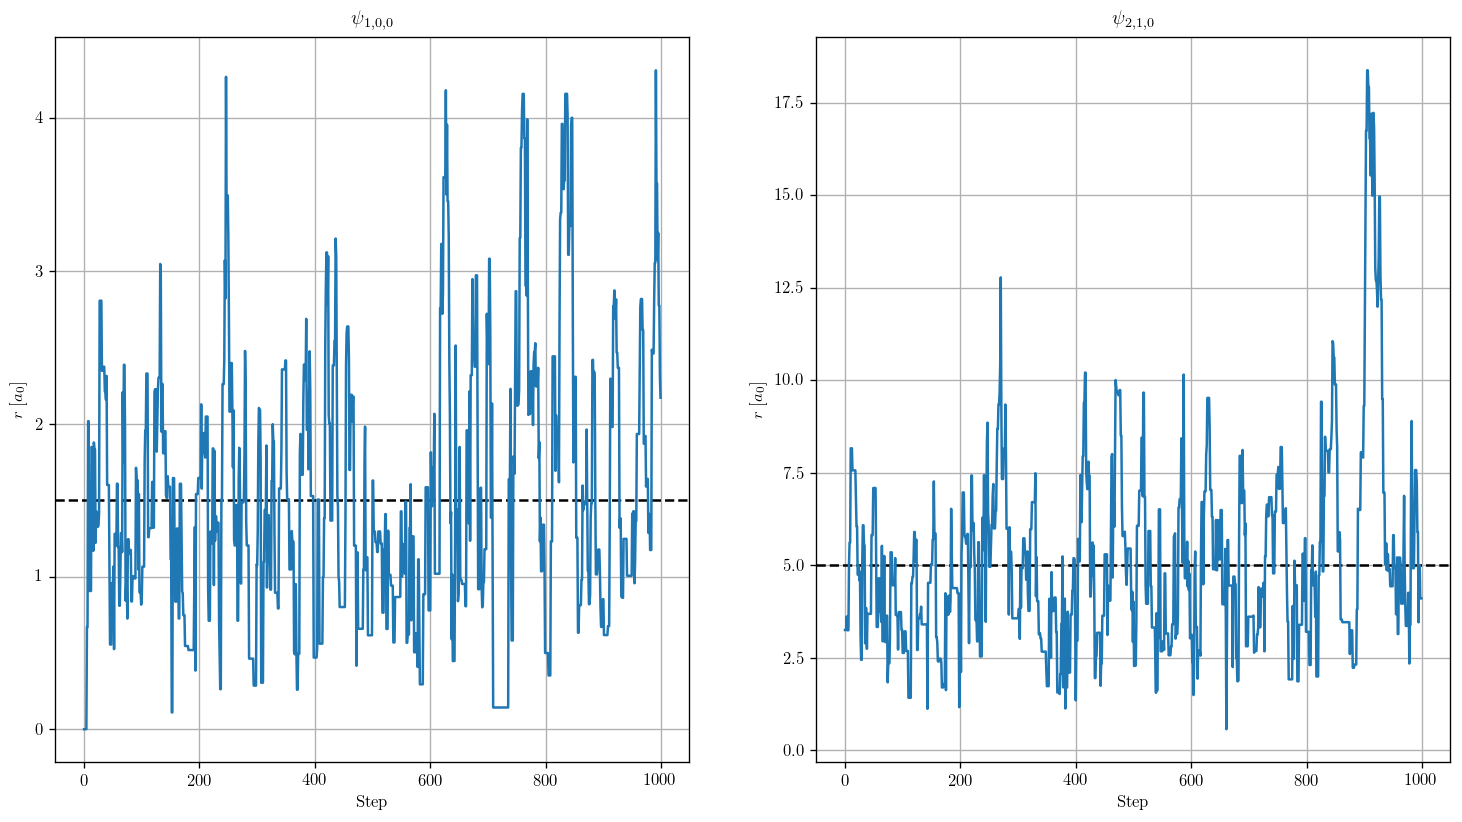

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

eq_r100=np.loadtxt("Ex_05_1/Unif/out_eq_r100.txt")
eq_r210=np.loadtxt("Ex_05_1/Unif/out_eq_r210.txt")

plt.rc('text', usetex=True)
plt.rc('font', family='serif')


fig, ax=plt.subplots(1,2, figsize=(15,8), dpi=120)

ax[0].axhline(1.5, 0,1, color="black",linestyle="dashed")
ax[1].axhline(5, 0,1, color="black",linestyle="dashed")

ax[0].plot(eq_r100)
ax[1].plot(eq_r210)

ax[0].set_title(r"$ \psi_{1,0,0}$")
ax[1].set_title(r"$\psi_{2,1,0}$")

for iax in ax:
    iax.set_ylabel(r"$ r \; [a_0]$")
    iax.set_xlabel("Step")
    iax.grid(True)
    
plt.show()

Si può osservare che in questo caso non c'è alcun transiente iniziale, il sistema è già equilibrato all'inizio.

## Campionamento e raggio medio

### Probabilità di transizione uniforme

Avendo scelto il parametro $\delta$ per la larghezza della distribuzione uniforme e il punto iniziale, ho effettuato il campionamento delle distribuzioni di probabilità e il calcolo di $\langle r \rangle$. Ho considerato <span style="color:red">$10^6$ step</span>. Effettuando la media di tutti gli acceptance rate $\alpha$, alla fine ottengo <span style="color:red">$\langle \alpha_{1,0,0} \rangle=0.500529$ e $\langle \alpha_{2,1,0} \rangle=0.499624$</span>

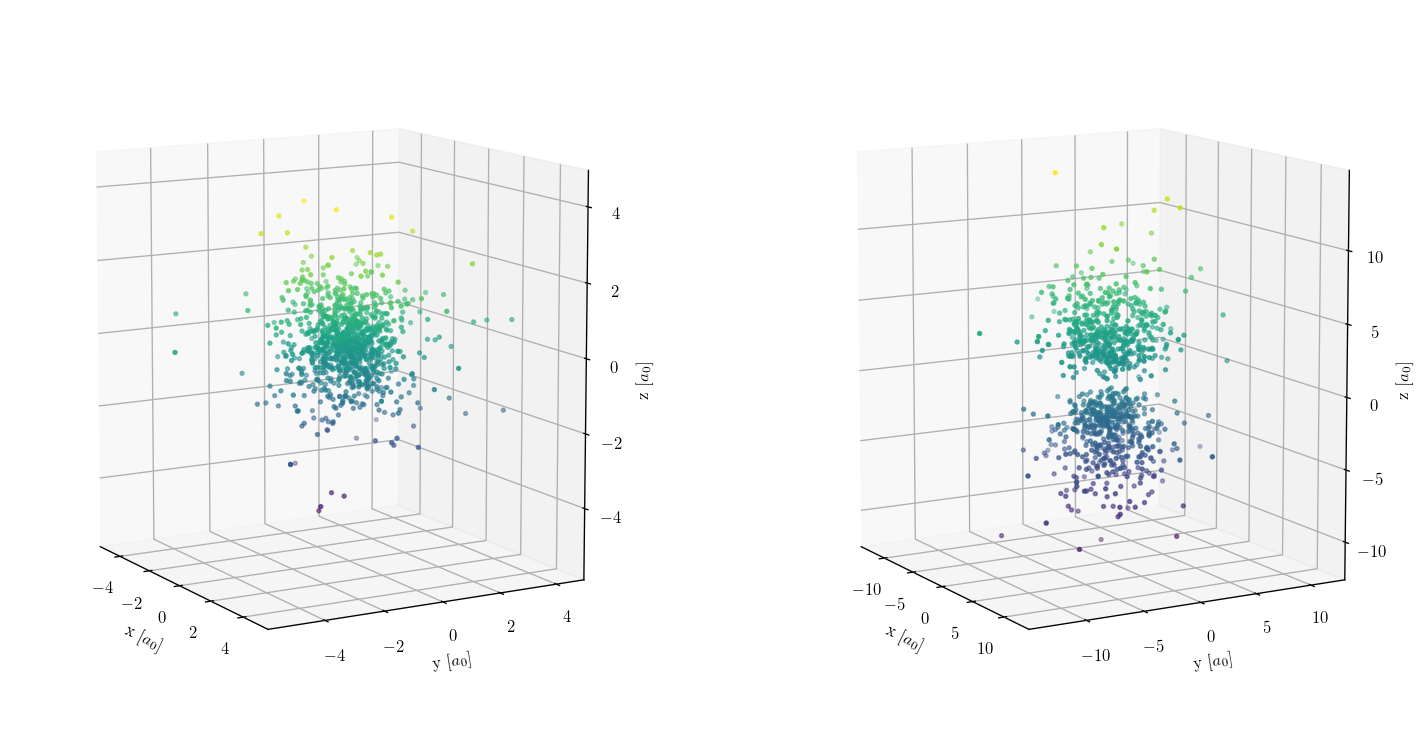

In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x100,y100,z100 = np.loadtxt("Ex_05_1/Unif/100.points", delimiter=",", skiprows=1, usecols=(0,1,2), dtype="float,float,float", unpack=True)
x210,y210,z210 = np.loadtxt("Ex_05_1/Unif/210.points", delimiter=",", skiprows=1, usecols=(0,1,2), dtype="float,float,float", unpack=True)

fig =plt.figure(figsize=(15,8),dpi=120)
ax100 = fig.add_subplot(121, projection='3d')
ax210 = fig.add_subplot(122, projection='3d')
ax100.scatter(x100, y100, z100 ,c=z100, marker=".")
ax210.scatter(x210, y210, z210, c=z210, marker=".")
ax100.set_xlabel(r'x $[a_0]$')
ax100.set_ylabel(r'y $[a_0]$')
ax100.set_zlabel(r'z $[a_0]$')
ax210.set_xlabel(r'x $[a_0]$')
ax210.set_ylabel(r'y $[a_0]$')
ax210.set_zlabel(r'z $[a_0]$')

#Per mantenere la stessa scala su tutti gli assi
max_range100 = np.array([x100.max()-x100.min(), y100.max()-y100.min(), z100.max()-z100.min()]).max() / 2.0
mid_x100 = (x100.max()+x100.min()) * 0.5
mid_y100 = (y100.max()+y100.min()) * 0.5
mid_z100 = (z100.max()+z100.min()) * 0.5
ax100.set_xlim(mid_x100 - max_range100, mid_x100 + max_range100)
ax100.set_ylim(mid_y100 - max_range100, mid_y100 + max_range100)
ax100.set_zlim(mid_z100 - max_range100, mid_z100 + max_range100)

#Per mantenere la stessa scala su tutti gli assi
max_range210 = np.array([x210.max()-x210.min(), y210.max()-y210.min(), z210.max()-z210.min()]).max() / 2.0
mid_x210 = (x210.max()+x210.min()) * 0.5
mid_y210 = (y210.max()+y210.min()) * 0.5
mid_z210 = (z210.max()+z210.min()) * 0.5
ax210.set_xlim(mid_x210 - max_range210, mid_x210 + max_range210)
ax210.set_ylim(mid_y210 - max_range210, mid_y210 + max_range210)
ax210.set_zlim(mid_z210 - max_range210, mid_z210 + max_range210)

ax100.view_init(10,-30)
ax210.view_init(10,-30)
plt.show()

Nei due grafici sopra ho rappresentato alcuni dei punti campionati, nello specifico è rappresentato un punto ogni 1000.

Per il calcolo del valor medio con il metodo del data blocking, ho considerato <span style="color:red">blocchi con $10^4$ punti ciascuno</span>. Non ho comunque riscontrato significative differenze nella stima dell'incertezza finale anche considerando blocchi con $10^2$ e $10^3$ punti ciascuno (considerando blocchi da $10$ misure ciascuno, invece, l'incertezza viene sottostimata a causa delle correlazioni ancora rilevanti). 

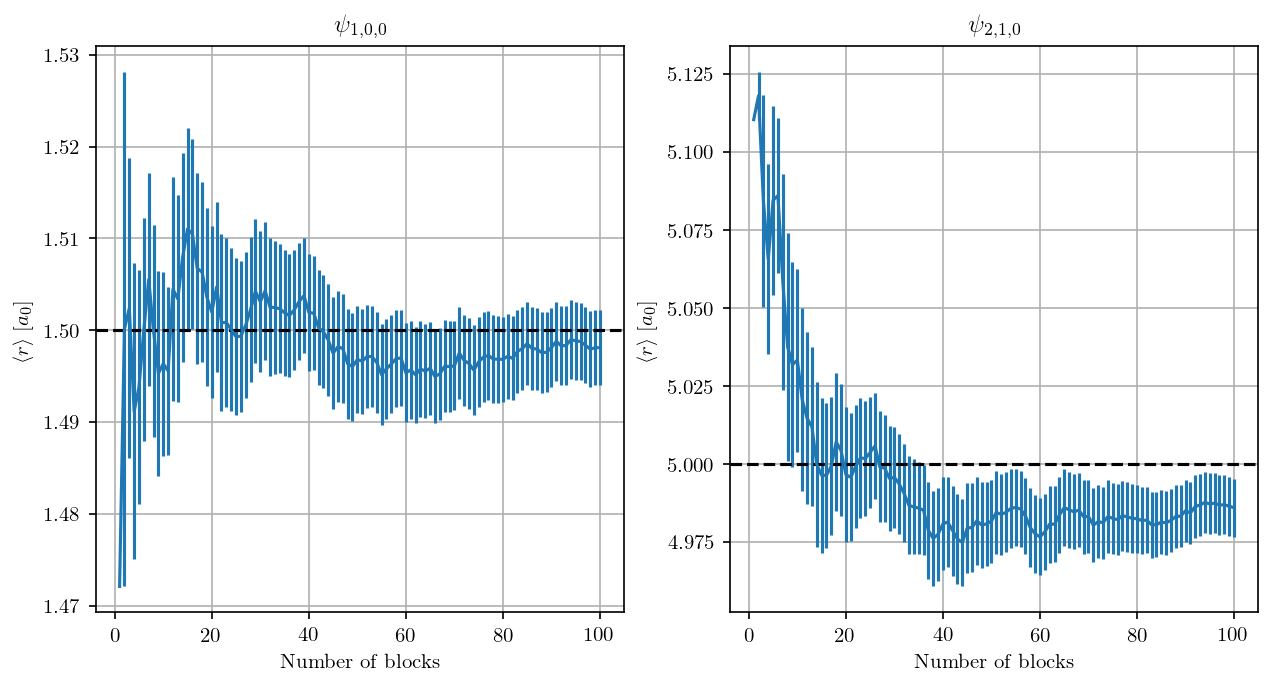

In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

n_r100,avg_r100,err_r100=np.loadtxt("Ex_05_1/Unif/out_r100.txt", delimiter=",", skiprows=1, usecols=(0,1,2), dtype="int,float,float", unpack=True)
n_r210,avg_r210,err_r210=np.loadtxt("Ex_05_1/Unif/out_r210.txt", delimiter=",", skiprows=1, usecols=(0,1,2), dtype="int,float,float", unpack=True)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')


fig, ax=plt.subplots(1,2, figsize=(10,5), dpi=150)

ax[0].axhline(1.5, 0,1, color="black",linestyle="dashed")
ax[1].axhline(5, 0,1, color="black",linestyle="dashed")

ax[0].errorbar(n_r100,avg_r100,yerr=err_r100)
ax[1].errorbar(n_r210,avg_r210,yerr=err_r210)

ax[0].set_title(r"$ \psi_{1,0,0}$")
ax[1].set_title(r"$\psi_{2,1,0}$")

for iax in ax:
    iax.set_ylabel(r"$ \langle r \rangle \; [a_0]$")
    iax.set_xlabel("Number of blocks")
    iax.grid(True)
    
plt.show()

I valori medi calcolati per la distanza media dal centro converge in entrambi i casi al valore atteso al crescere del numero di blocchi considerati. I valori finali ottenuti sono 
<span style="color:red">
$$\langle r \rangle _{1,0,0}=1.498\pm 0.004 $$
$$\langle r \rangle _{2,1,0}=4.986\pm 0.009 $$
</span>

Sono compatibili con i valori attesi calcolati analiticamente.

### Probabilità di transizione gaussiana

Ho effettuato un altro campionamento utilizzando una probabilità di transizione gaussiana con le deviazioni standard indicate nel primo paragrafo. Valgono ovviamente le considerazioni fatte prima per la distribuzione uniforme, riporto quindi soltanto i risultati finali. Per gli acceptance rate $\alpha$, ho ottenuto <span style="color:red">$\langle \alpha_{1,0,0} \rangle=0.500532$ e $\langle \alpha_{2,1,0} \rangle=0.499894$</span>

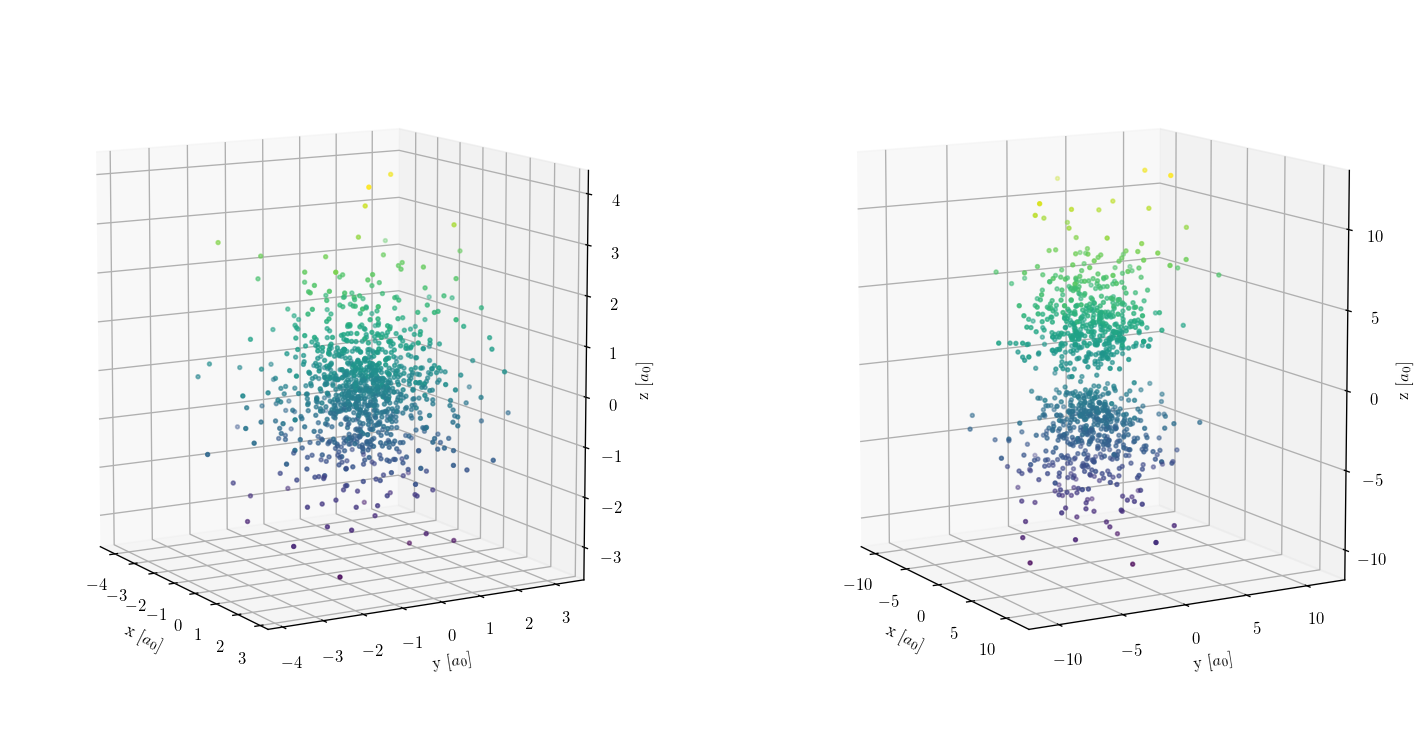

In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x100,y100,z100 = np.loadtxt("Ex_05_1/Gauss/100.points", delimiter=",", skiprows=1, usecols=(0,1,2), dtype="float,float,float", unpack=True)
x210,y210,z210 = np.loadtxt("Ex_05_1/Gauss/210.points", delimiter=",", skiprows=1, usecols=(0,1,2), dtype="float,float,float", unpack=True)

fig =plt.figure(figsize=(15,8),dpi=120)
ax100 = fig.add_subplot(121, projection='3d')
ax210 = fig.add_subplot(122, projection='3d')
ax100.scatter(x100, y100, z100 ,c=z100, marker=".")
ax210.scatter(x210, y210, z210, c=z210, marker=".")
ax100.set_xlabel(r'x $[a_0]$')
ax100.set_ylabel(r'y $[a_0]$')
ax100.set_zlabel(r'z $[a_0]$')
ax210.set_xlabel(r'x $[a_0]$')
ax210.set_ylabel(r'y $[a_0]$')
ax210.set_zlabel(r'z $[a_0]$')

#Per mantenere la stessa scala su tutti gli assi
max_range100 = np.array([x100.max()-x100.min(), y100.max()-y100.min(), z100.max()-z100.min()]).max() / 2.0
mid_x100 = (x100.max()+x100.min()) * 0.5
mid_y100 = (y100.max()+y100.min()) * 0.5
mid_z100 = (z100.max()+z100.min()) * 0.5
ax100.set_xlim(mid_x100 - max_range100, mid_x100 + max_range100)
ax100.set_ylim(mid_y100 - max_range100, mid_y100 + max_range100)
ax100.set_zlim(mid_z100 - max_range100, mid_z100 + max_range100)

#Per mantenere la stessa scala su tutti gli assi
max_range210 = np.array([x210.max()-x210.min(), y210.max()-y210.min(), z210.max()-z210.min()]).max() / 2.0
mid_x210 = (x210.max()+x210.min()) * 0.5
mid_y210 = (y210.max()+y210.min()) * 0.5
mid_z210 = (z210.max()+z210.min()) * 0.5
ax210.set_xlim(mid_x210 - max_range210, mid_x210 + max_range210)
ax210.set_ylim(mid_y210 - max_range210, mid_y210 + max_range210)
ax210.set_zlim(mid_z210 - max_range210, mid_z210 + max_range210)

ax100.view_init(10,-30)
ax210.view_init(10,-30)
plt.show()

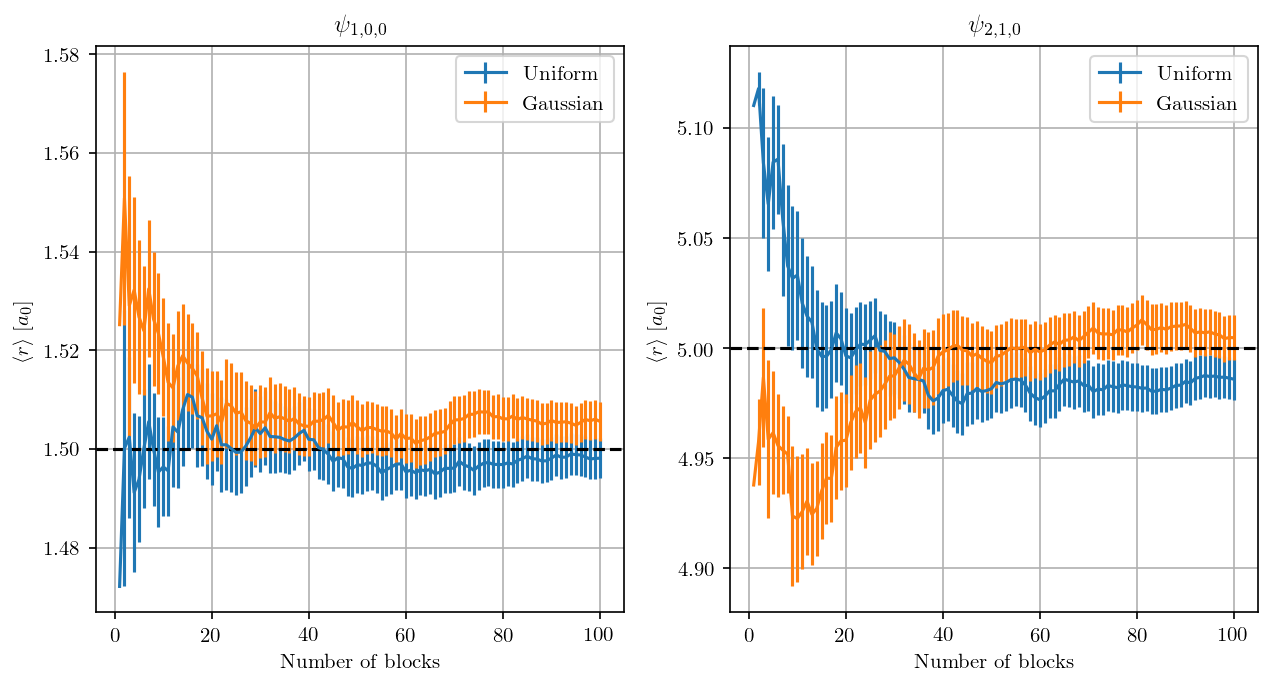

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

n_r100_unif,avg_r100_unif,err_r100_unif=np.loadtxt("Ex_05_1/Unif/out_r100.txt", delimiter=",", skiprows=1, usecols=(0,1,2), dtype="int,float,float", unpack=True)
n_r210_unif,avg_r210_unif,err_r210_unif=np.loadtxt("Ex_05_1/Unif/out_r210.txt", delimiter=",", skiprows=1, usecols=(0,1,2), dtype="int,float,float", unpack=True)
n_r100,avg_r100,err_r100=np.loadtxt("Ex_05_1/Gauss/out_r100.txt", delimiter=",", skiprows=1, usecols=(0,1,2), dtype="int,float,float", unpack=True)
n_r210,avg_r210,err_r210=np.loadtxt("Ex_05_1/Gauss/out_r210.txt", delimiter=",", skiprows=1, usecols=(0,1,2), dtype="int,float,float", unpack=True)



plt.rc('text', usetex=True)
plt.rc('font', family='serif')


fig, ax=plt.subplots(1,2, figsize=(10,5), dpi=150)

ax[0].axhline(1.5, 0,1, color="black",linestyle="dashed")
ax[1].axhline(5, 0,1, color="black",linestyle="dashed")

ax[0].errorbar(n_r100_unif,avg_r100_unif,yerr=err_r100_unif, label="Uniform")
ax[1].errorbar(n_r210_unif,avg_r210_unif,yerr=err_r210_unif, label="Uniform")
ax[0].errorbar(n_r100,avg_r100,yerr=err_r100, label="Gaussian")
ax[1].errorbar(n_r210,avg_r210,yerr=err_r210, label="Gaussian")

ax[0].set_title(r"$ \psi_{1,0,0}$")
ax[1].set_title(r"$\psi_{2,1,0}$")

for iax in ax:
    iax.set_ylabel(r"$ \langle r \rangle \; [a_0]$")
    iax.set_xlabel("Number of blocks")
    iax.grid(True)
    iax.legend()
    
plt.show()

I valori medi finali per le distanze dall'origine risultno compatibili con i valori attesi calcolati analiticamente:
<span style="color:red">
$$\langle r \rangle _{1,0,0}=1.506\pm 0.004 $$
$$\langle r \rangle _{2,1,0}=5.005\pm 0.010 $$
</span>

Non ci sono quindi significative differenze con il campionamento effettuato utilizzando una probabilità di transizione uniforme. Questo è in accordo con quanto atteso dal punto di vista teorico: la convergenza dell'algoritmo di Metropolis alla distribuzione di probabilità che si vuole campionare è indipendente dalla scelta di $T(x|y)$, che però ha ovviamente un effetto sull'efficienza dell'algoritmo. Tra queste due scelte di $T(x|y)$, invece, sembra non esserci una differenza significativa neanche nell'efficienza.